(0.0, 2.0, 0.0, 15.0)

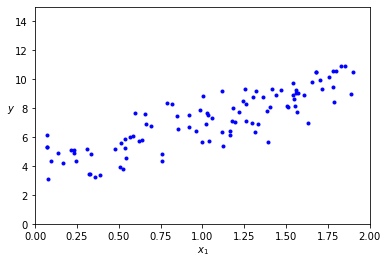

In [1]:
# 데이터 샘플 생성

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(20)

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.plot(X,y,'b.')
plt.xlabel('$x_1$',fontsize = 10)
plt.ylabel('$y$',rotation = 0 ,fontsize = 10)
plt.axis([0,2,0,15])

In [2]:
# 각 특성벡터의 첫번째 좌표에 bias에 대응되는 1을 추가하여 Xb로 수정
# 여러가지 경사하강법을 직접 구현해볼 때 사용

Xb = np.column_stack((np.ones((100,1)),X))

In [3]:
X_new = np.array([[0],[2]])
Xb_new = np.column_stack((np.ones((2,1)),X_new))

## Linear Regression 이용
- 학습을 시킨 후 bias값은 학습된 객체의 intercept_ 속성에서, 가중치는 coef_ 속성에서 확인가능

In [4]:
lin_reg_svd = LinearRegression()
lin_reg_svd.fit(X,y)

theta_svd = np.array([lin_reg_svd.intercept_,lin_reg_svd.coef_],dtype = float)
theta_svd

C:\Users\82108\anaconda3\envs\ML2021\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  after removing the cwd from sys.path.


array([[3.8115615 ],
       [3.23892352]])

In [5]:
y_predict_svd = lin_reg_svd.predict(X_new)
y_predict_svd

array([[ 3.8115615 ],
       [10.28940854]])

Text(0.5, 1.0, 'Linear regression with SVD')

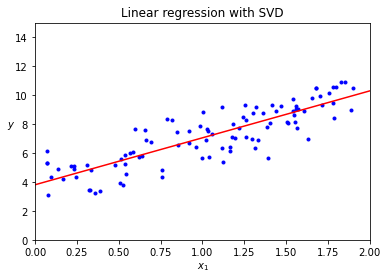

In [6]:
# 모델의 예측을 그래프에 나타내기

plt.plot(X,y,'b.')
plt.plot(X_new,y_predict_svd,'r-')
plt.xlabel('$x_1$',fontsize=10)
plt.ylabel('$y$',fontsize=10,rotation=0)
plt.axis([0,2,0,15])
plt.title('Linear regression with SVD')

## 경사하강법

In [7]:
eta = 0.1 # 학습률
n_epochs = 1000 # epoch 수
m = 100

theta_bgd = np.random.randn(2,1) #무작위로 theta 초깃값 설정

for iteration in range(n_epochs):
    # 설명의 식 (2) 구현
    gradients = 2/m*Xb.T.dot(Xb.dot(theta_bgd)-y) 
    # 설명의 식 (3) 구현
    theta_bgd = theta_bgd - eta*gradients
    

In [8]:
print(f'theta_bgd: \n {theta_bgd}')
print()
print(f'theta_svd: \n {theta_svd}')

theta_bgd: 
 [[3.8115615 ]
 [3.23892352]]

theta_svd: 
 [[3.8115615 ]
 [3.23892352]]


In [9]:
y_predict_bgd = Xb_new.dot(theta_bgd)
y_predict_bgd

array([[ 3.8115615 ],
       [10.28940854]])

Text(0.5, 1.0, 'Linear regression with BGD (learning rate : 0.1)')

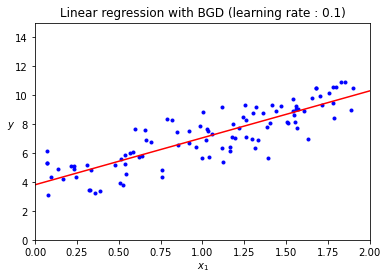

In [10]:
plt.plot(X,y,'b.')
plt.plot(X_new,y_predict_bgd,'r-')
plt.xlabel('$x_1$',fontsize = 10)
plt.ylabel('$y$',fontsize = 10, rotation = 0)
plt.axis([0,2,0,15])
plt.title(f'Linear regression with BGD (learning rate : {eta})')

In [11]:
theta_bgd_path = []

def plot_bgd(theta, eta, theta_path = None):
    m = len(Xb)
    plt.plot(X,y,"b.")
    plt.plot([0,2],[4,10],'r-')
    n_epochs = 1000
    for iteration in range(n_epochs):
        if iteration < 21:
            y_predict = Xb_new.dot(theta)
            if(iteration == 0):
                plt.plot(X_new,y_predict,'m-',linewidth=1)
            else:
                plt.plot(X_new,y_predict,'g-',linewidth=1,alpha = 0.05*iteration)
        gradients = 2/m * Xb.T.dot(Xb.dot(theta)-y)
        theta = theta - eta * gradients
        if theta_path is not None : 
            theta_path.append(theta)
    plt.xlabel('$x_1$',fontsize = 10)
    plt.axis([0,2,0,15])
    plt.title(f'$Weta = {eta}$',fontsize = 11)
        

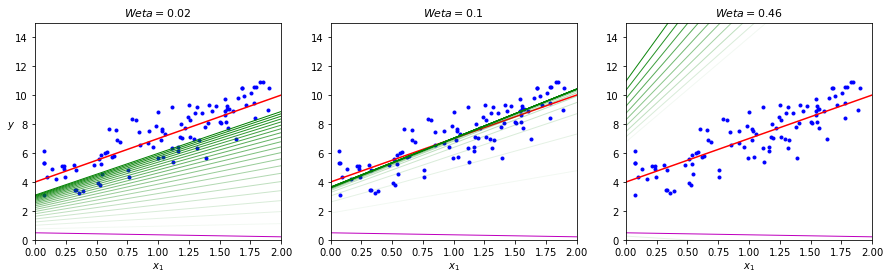

In [12]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize = (15,4))

plt.subplot(131);plot_bgd(theta,eta=0.02)
plt.ylabel('$y$',rotation = 0,fontsize = 10)
plt.subplot(132);plot_bgd(theta,eta=0.1,theta_path = theta_bgd_path)
plt.subplot(133);plot_bgd(theta,eta=0.46)

## 확률적 경사하강법

In [13]:
theta_sgd_path = []
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터
m = 100         # 샘플 수

def learning_schedule(t):
    return t0/(t+t1)


theta_sgd = np.random.randn(2,1)  # theta 무작위 초기화


for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m) # 하나의 샘플을 임의로 뽑기
        tx = Xb[random_idx:random_idx+1]  # 배열의 크기가 그대로
        ty = y[random_idx:random_idx+1]   # 배열의 크기가 그대로
        gradients = 2*tx.T.dot(tx.dot(theta_sgd)-ty)
        eta = learning_schedule(epoch*m+i)
        theta_sgd = theta_sgd - eta * gradients
        theta_sgd_path.append(theta_sgd)

In [14]:
print(f"theta_svd:\n {theta_svd}")
print()
print(f"theta_bgd:\n {theta_bgd}")
print()
print(f"theta_sgd:\n {theta_sgd}")

theta_svd:
 [[3.8115615 ]
 [3.23892352]]

theta_bgd:
 [[3.8115615 ]
 [3.23892352]]

theta_sgd:
 [[3.76987039]
 [3.29769301]]


### 그림으로 확인해보기
- 학습 과정 중 처음 20개의 (𝜃)에 대응하는 직선의 그래프를 그려보자
(업데이트 될 수록 직선이 진해지도록).

(0.0, 2.0, 0.0, 15.0)

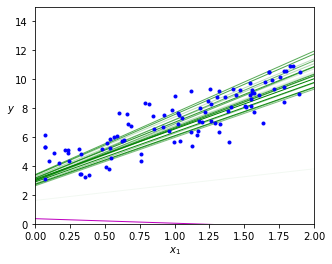

In [15]:
theta_sgd = np.random.randn(2,1)  # 랜덤 초기화
plt.figure(figsize=(5,4))

for i in range(21):
    y_predict_sgd = Xb_new.dot(theta_sgd)            
    if i==0:  # 학습이 일어나지 않을 때
        plt.plot(X_new, y_predict_sgd, "m-", linewidth=1)
    else:     # 나머지 (학습이 진행될수록 직선이 진해지도록)
        plt.plot(X_new, y_predict_sgd, "g-", linewidth=1, alpha=0.05*i)
    random_idx = np.random.randint(m)
    tx = Xb[random_idx:random_idx+1]
    ty = y[random_idx:random_idx+1]
    gradients = 2 * tx.T.dot(tx.dot(theta_sgd) - ty)
    eta = learning_schedule(i)
    theta_sgd = theta_sgd - eta * gradients
    
plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=10)                      
plt.ylabel("$y$", rotation=0, fontsize=10)           
plt.axis([0, 2, 0, 15])                               

### sklearn 이용

In [16]:
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel()) # 2차원 배열 y를 1차원 배열로 !

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.75972497]), array([3.16465032]))

## 미니배치 경사 하강법 1 : 구현

In [18]:
theta_mgd_path = []

n_epochs = 50
minibatch_size = 20

np.random.seed(42)
theta_mgd = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000  # 앞 sgd와 다르게 학습 시키는 size가 크므로 이 값도 크게 설정
def learning_schedule(t):
    return t0/(t+t1)

t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    Xb_shuffled = Xb[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t += 1
        tx = Xb_shuffled[i:i+minibatch_size]
        ty = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * tx.T.dot(tx.dot(theta_mgd)-ty)
        eta = learning_schedule(t)
        theta_mgd = theta_mgd - eta * gradients
        theta_mgd_path.append(theta_mgd)

In [19]:
print(f"theta_mgd:\n {theta_mgd}")

theta_mgd:
 [[3.80536591]
 [3.25424808]]


## 파라미터 공간에 표시된 경사하강법의 경로 비교

In [20]:
theta_bgd_path = np.array(theta_bgd_path)
theta_sgd_path = np.array(theta_sgd_path)
theta_mgd_path = np.array(theta_mgd_path)

(2.5, 4.25, 2.3, 3.9)

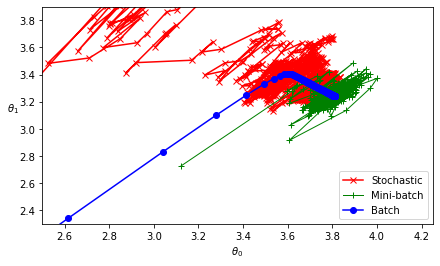

In [21]:
plt.figure(figsize = (7,4))
plt.plot(theta_sgd_path[:,0], theta_sgd_path[:,1],'r-x',linewidth=1.5,label="Stochastic")
plt.plot(theta_mgd_path[:,0], theta_mgd_path[:,1],'g-+',linewidth=1,label="Mini-batch")
plt.plot(theta_bgd_path[:,0], theta_bgd_path[:,1],'b-o',linewidth=1.5,label="Batch")
plt.legend(loc = "lower right",fontsize = 10)
plt.xlabel(r"$\theta_0$",fontsize = 10)
plt.ylabel(r"$\theta_1$  ", fontsize = 10, rotation = 0)
plt.axis([2.5,4.25,2.3,3.9])

## 비선형 데이터셋에 선형회귀 모델을 적용하는 방법

In [22]:
np.random.seed(42)

m = 100
X2 = 6*np.random.rand(m,1)-3
y2 = 0.5*X2**2 + X2 + 2 + np.random.randn(m,1)

(-3.0, 3.0, 0.0, 10.0)

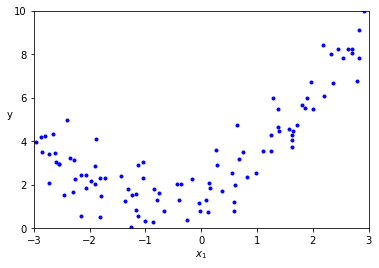

In [23]:
plt.plot(X2,y2,"b.")
plt.xlabel("$x_1$",fontsize = 10)
plt.ylabel("y",fontsize = 10, rotation = 0)
plt.axis([-3,3,0,10])

In [26]:
# 원래 속성은 x이지만, 특성벡터를 (x,x**2) 으로 변환

X2_poly = np.column_stack((X2,X2**2))

In [30]:
X2_poly[:3]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281]])

In [31]:
# 확장된 훈련 데이터셋에 대해 선형회귀 모델 학습

poly2_reg = LinearRegression()
poly2_reg.fit(X2_poly,y2)
poly2_reg.intercept_, poly2_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

fhat(x) = 1.78134581 + 0.93366893X + 0.56456263X^2 인 상황

(-3.0, 3.0, 0.0, 10.0)

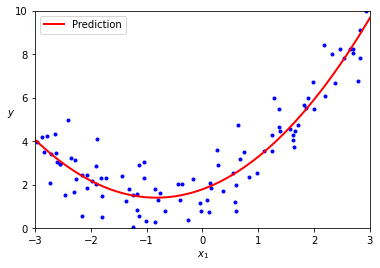

In [39]:
# 학습된 결과를 그림으로

X2_new = np.linspace(-3,3,100).reshape(100,1)
X2_new_poly = np.column_stack((X2_new,X2_new**2))
y2_new = poly2_reg.predict(X2_new_poly)

plt.plot(X2,y2,"b.")
plt.plot(X2_new,y2_new,"r-",linewidth = 2, label = "Prediction")
plt.xlabel("$x_1$",fontsize = 10)
plt.ylabel("$y$",rotation = 0, fontsize = 10)
plt.legend(loc = "upper left", fontsize = 10)
plt.axis([-3,3,0,10])

sklearn.preprocessing, PolynomialFeatures

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# include_bias : 상수항을 집어넣을 것인지 말 것인지
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X2_poly2 = poly_features.fit_transform(X2)

In [42]:
# 직접 확장한 데이터셋과 동일함을 확인

(X2_poly == X2_poly2).all() #np.array.all

True

## 모델의 복잡도가 적절한지를 판단하는 방법 : 교차검증, 학습곡선

(-3.0, 3.0, 0.0, 10.0)

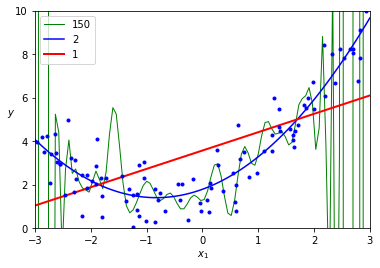

In [47]:
from sklearn.preprocessing import StandardScaler

for color, width, degree in (("g-",1,150),("b-",1.5,2),("r-",2,1)):
    poly_features = PolynomialFeatures(degree = degree, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    X2_poly = poly_features.fit_transform(X2)
    X2_poly_scaled = std_scaler.fit_transform(X2_poly)
    lin_reg.fit(X2_poly_scaled,y2)
    
    y2_new_pred = lin_reg.predict(std_scaler.transform(poly_features.transform(X2_new)))
    plt.plot(X2_new, y2_new_pred, color, label = str(degree), linewidth = width)


plt.plot(X2,y2,"b.",linewidth = 3)
plt.legend(loc = "upper left")
plt.xlabel("$x_1$",fontsize = 10)
plt.ylabel("$y$",rotation = 0, fontsize = 10)
plt.axis([-3,3,0,10])

## 모델의 복잡도가 적절한 지를 판단하는 방법: 교차검증, 학습곡선

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def plot_learning_curves_pre(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2) #여기서 이미 무작위로 섞임
    train_mse, val_mse = [], []
    for m in range(2, len(X_train)+1):
        model.fit(X_train[:m],y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        
        train_mse.append(mean_squared_error(y_train[:m],y_train_pred))
        val_mse.append(mean_squared_error(y_val,y_val_pred))
    
    plt.plot(np.sqrt(train_mse),"b-",linewidth=1,label="train")
    plt.plot(np.sqrt(val_mse),"r-",linewidth=1,label = "val")
    plt.legend(loc = "upper right", fontsize = 10)
    plt.xlabel("Training set size",fontsize = 10)
    plt.ylabel("RMSE",fontsize = 10)

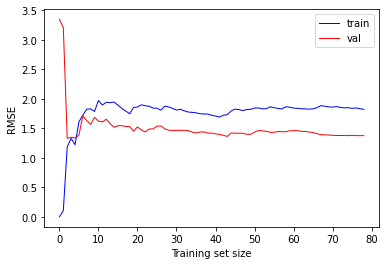

In [63]:
lin_reg = LinearRegression()
plot_learning_curves_pre(lin_reg, X2, y2)

In [70]:
def plot_learning_curves(model, X, y, num_iter,range_y=None, metric='mse'):  
    np.random.seed(42)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) # 여기서 이미 무작위로 섞임
    train_score_mean, val_score_mean = np.zeros(len(X_train)-1), np.zeros(len(X_train)-1)
    
    if metric == "r2":
        score_ftn = r2_score  # sklearn.metrics 함수
    else:
        score_ftn = mean_squared_error   # sklearn.metrics 함수
        
    for i in range(num_iter):
        train_score, val_score = [], [] 
        for m in range(2, len(X_train)+1):
            model.fit(X_train[:m], y_train[:m])
            y_train_pred = model.predict(X_train[:m])
            y_val_pred = model.predict(X_val)
            
            train_score.append(score_ftn(y_train[:m], y_train_pred))
            val_score.append(score_ftn(y_val, y_val_pred))
            
        if metric =="r2":
            plt.plot(range(2, len(X_train)+1),train_score, "b-", linewidth=1, alpha = 0.2)
            plt.plot(range(2, len(X_train)+1),val_score, "r-", linewidth=1, alpha = 0.2)
        else:
            plt.plot(range(2, len(X_train)+1),np.sqrt(train_score), "b-", linewidth=1, alpha = 0.2)
            plt.plot(range(2, len(X_train)+1),np.sqrt(val_score), "r-", linewidth=1, alpha = 0.2)
        
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
        train_score_mean +=train_score
        val_score_mean +=val_score
    train_score_mean = train_score_mean/num_iter
    val_score_mean = val_score_mean/num_iter
    
    if metric=="r2":
        plt.plot(range(2, len(X_train)+1),train_score_mean, "b-", linewidth=2, label="train")
        plt.plot(range(2, len(X_train)+1),val_score_mean, "r-+", linewidth=2, label="val")
        plt.ylabel("$R^2$", fontsize=10)
        plt.ylim((0,1))
        
    else:
        plt.plot(range(2, len(X_train)+1), np.sqrt(train_score_mean), "b-", linewidth=2, label="train")
        plt.plot(range(2, len(X_train)+1), np.sqrt(val_score_mean), "r-+", linewidth=2, label="val")
        plt.ylabel("RMSE", fontsize=10)
        plt.ylim(bottom=0)
        
    plt.legend(loc="upper right", fontsize=10)
    plt.xlabel("Training set size", fontsize=10)
    
    if range_y!=None:
        plt.ylim(top=range_y)

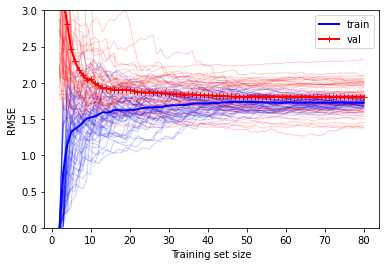

In [71]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X2,y2,50,3)

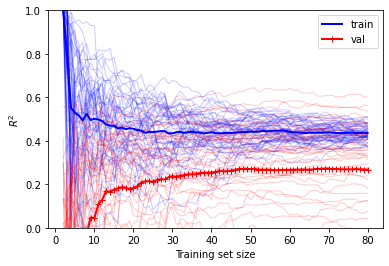

In [76]:
plot_learning_curves(lin_reg,X2,y2,50,metric="r2")

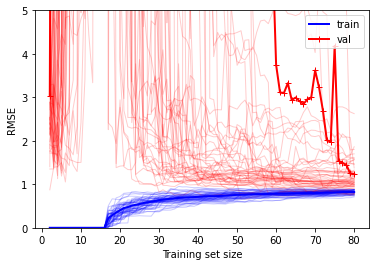

In [85]:
poly_features = PolynomialFeatures(degree = 15, include_bias = False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

X2_poly = poly_features.fit_transform(X2)
X2_poly_scaled = std_scaler.fit_transform(X2_poly)

plot_learning_curves(lin_reg,X2_poly_scaled,y2,50,5)

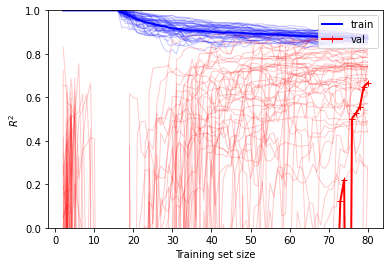

In [86]:
plot_learning_curves(lin_reg,X2_poly_scaled,y2,50,metric = "r2")

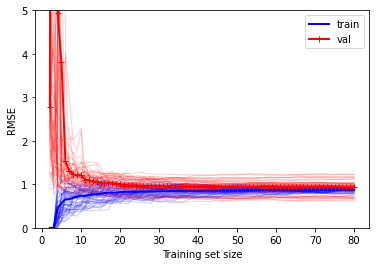

In [88]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

X2_poly_yk = poly_features.fit_transform(X2)
X2_poly_yk_scaled = std_scaler.fit_transform(X2_poly_yk)

plot_learning_curves(lin_reg,X2_poly_yk_scaled,y2,50,5)

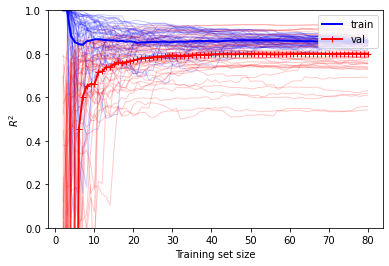

In [89]:
plot_learning_curves(lin_reg,X2_poly_yk_scaled,y2,50,metric="r2")